## 전국 연령별 평균 월급 조사

In [2]:
# 데이터 로드
# 통계청 2013년 발표 연령, 남녀, 경력별 평균월급 데이터셋
df <- read.csv("r-ggagi-data/example_salary.csv", stringsAsFactors = T, na = '-') 
# - 값은 NA로 바꾸기

In [3]:
head(df)

연령,월급여액..원.,연간특별급여액..원.,근로시간..시간.,근로자수..명.,경력구분,성별
-19,1346534,151840,169.5,15042,1년미만,남
20-24,1584214,115375,180.1,74251,1년미만,남
25-29,1922043,268058,178.0,143338,1년미만,남
30-34,2130988,335710,180.8,103585,1년미만,남
35-39,2414345,352816,181.4,65385,1년미만,남
40-44,2372214,233728,182.9,55422,1년미만,남


In [20]:
# 한글 변수명 => 영문으로 바꾸기
colnames(df)
colnames(df) <- c('age','salary','specialSalary','workingTime','numberOfWorker','career','sex')

[1] "age"            "salary"         "sepcialSalary"  "workingTime"   
[5] "numberOfWorker" "career"         "sex"

In [21]:
colnames(df)

[1] "age"            "salary"         "specialSalary"  "workingTime"   
[5] "numberOfWorker" "career"         "sex"

In [22]:
str(df)

'data.frame':	100 obs. of  7 variables:
 $ age           : Factor w/ 10 levels "-19","20-24",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ salary        : num  1346534 1584214 1922043 2130988 2414345 ...
 $ specialSalary : num  151840 115375 268058 335710 352816 ...
 $ workingTime   : num  170 180 178 181 181 ...
 $ numberOfWorker: num  15042 74251 143338 103585 65385 ...
 $ career        : Factor w/ 5 levels "1~3년미만","10년이상",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ sex           : Factor w/ 2 levels "남","여": 1 1 1 1 1 1 1 1 1 1 ...


In [23]:
# 평균 월급 구하기
Mean <- mean(df$salary, na.rm = T)
Mean

[1] 2171578

In [24]:
# 아웃라이어 여향이 있는지 월 중앙값 계산
Median  <- median(df$salary, na.rm = T)
Median

[1] 2120345

In [25]:
# 범위 구하기
Range <- range(df$salary, na.rm = T)
Range

[1] 1117605 4064286

In [26]:
# 4064286 월급 연령대, 성별 , 경력 확인
w <- which(df$salary == 4064286)
w

[1] 48

In [27]:
df[w,]

,age,salary,specialSalary,workingTime,numberOfWorker,career,sex
48,50-54,4064286,12716896,178.2,439450,10년이상,남


In [28]:
# 4분위 
Quantile <- quantile(df$salary, na.rm = T)
Quantile

0%     25%     50%     75%    100% 
1117605 1689658 2120345 2519221 4064286

In [29]:
# 리스트에 데이터 담기
Salary <- list(평균=Mean, 중앙값=Median, 범위=Range, 사분위=Quantile)
Salary

$평균
[1] 2171578

$중앙값
[1] 2120345

$범위
[1] 1117605 4064286

$사분위
     0%     25%     50%     75%    100% 
1117605 1689658 2120345 2519221 4064286

### 그룹별 평균구하기

In [30]:
head(df)

age,salary,specialSalary,workingTime,numberOfWorker,career,sex
-19,1346534,151840,169.5,15042,1년미만,남
20-24,1584214,115375,180.1,74251,1년미만,남
25-29,1922043,268058,178.0,143338,1년미만,남
30-34,2130988,335710,180.8,103585,1년미만,남
35-39,2414345,352816,181.4,65385,1년미만,남
40-44,2372214,233728,182.9,55422,1년미만,남


In [31]:
# 성별 평균월급 - tapply() : gropu by
temp <- tapply(df$salary, df$sex, mean, na.rm = T)
temp

남      여 
2477332 1865823

In [32]:
library("reshape2")
library('ggplot2')

In [33]:
melt <- melt(temp)
melt

Var1,value
남,2477332
여,1865823


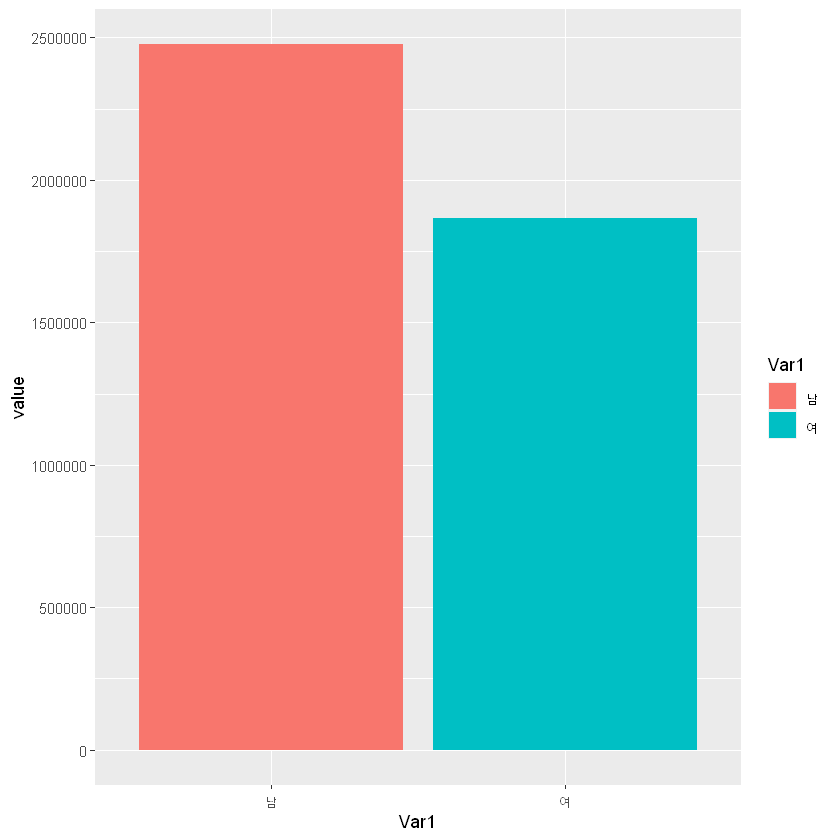

In [34]:
ggplot(melt, aes(x=Var1, y=value, fill=Var1)) +
geom_bar(stat="identity")

In [35]:
#표준편차 (sapply-1개의 변수, tapply-2개의 변수 (앞이 보고싶은 data))
tapply(df$salary, df$sex, sd, na.rm=T)

남       여 
646470.7 468270.6

In [36]:
#범위
tapply(df$salary,df$sex, range, na.rm=T)

$남
[1] 1346534 4064286

$여
[1] 1117605 3002440

In [37]:
#경력별 평균월급
temp <- tapply(df$salary,df$career, mean, na.rm=T)
temp

1~3년미만   10년이상    1년미만  3~5년미만 5~10년미만 
   1905012    2907119    1730835    2028015    2360463

In [38]:
Melt <- melt(temp)
Melt

Var1,value
1~3년미만,1905012
10년이상,2907119
1년미만,1730835
3~5년미만,2028015
5~10년미만,2360463


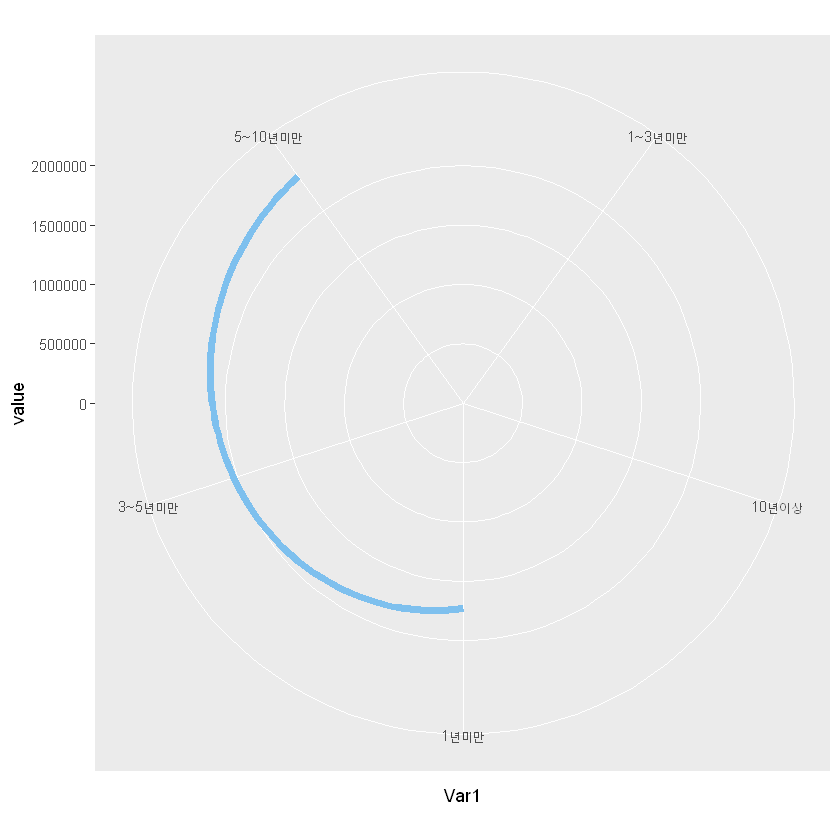

In [44]:
ggplot(Melt, aes(x=Var1, y=value, group=1)) +
geom_line(colour='skyblue2', size=2) +
coord_polar() +
ylim(0, max(melt$value))

In [45]:
#표준편차
tapply(df$salary, df$career, sd, na.rm=T)

1~3년미만   10년이상    1년미만  3~5년미만 5~10년미만 
  421332.8   690976.7   408110.4   460790.9   507244.7

In [46]:
#범위
tapply(df$salary,df$career, range, na.rm=T)

$`1~3년미만`
[1] 1172399 2619221

$`10년이상`
[1] 1685204 4064286

$`1년미만`
[1] 1117605 2414345

$`3~5년미만`
[1] 1245540 2827420

$`5~10년미만`
[1] 1548036 3309231

In [51]:
#경력별 가장 월급이 작은 그룹
w <- which(df$salary=='1172399')
w
a1  <- df[w,]
a1

[1] 70

,age,salary,specialSalary,workingTime,numberOfWorker,career,sex
70,60-,1172399,299639,151.2,30253,1~3년미만,여


In [53]:
#10이상에서 월급이 가장 작은사람
w <- which(df$salary=='1685204')
w
a2  <- df[w,]
a2

[1] 92

,age,salary,specialSalary,workingTime,numberOfWorker,career,sex
92,20-24,1685204,1970720,179.4,1886,10년이상,여


### 아웃라이어 찾기와 제거하기

In [54]:
df <- read.csv('r-ggagi-data/example_cancer.csv',stringsAsFactors = F,na='기록없음')

In [55]:
str(df)

'data.frame':	18310 obs. of  8 variables:
 $ age            : int  75 52 67 62 70 76 55 72 64 71 ...
 $ sex            : chr  "남" "여" "여" "남" ...
 $ height         : num  161 177 154 162 171 ...
 $ weight         : num  64 75.3 65.6 57 65 87 77 55 67 55.5 ...
 $ dateOfoperation: chr  "2011-06-22" "2011-05-19" "2011-05-31" "2011-06-21" ...
 $ cancerStaging  : chr  "I" "IV" "III" "I" ...
 $ hospitalization: int  48 17 10 11 10 10 12 18 15 35 ...
 $ diseaseCode    : chr  "C187" "C187" "C187" "C187" ...


In [56]:
#대장암에 걸리는 평균나이
mean(df$age)

[1] 63.50792

In [57]:
summary(df$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   55.00   64.00   63.51   72.00  102.00 

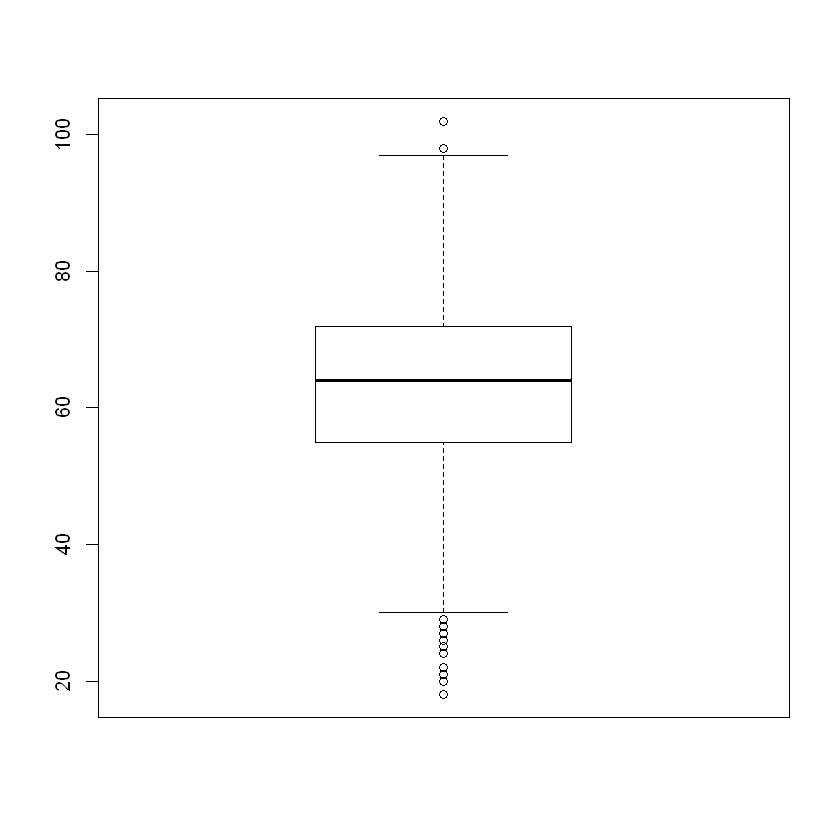

In [58]:
boxplot(df$age)

In [59]:
#IQR(interQurtiles Range) *1.5 = 아웃라이어(이상치)
dist_iqr <- IQR(df$age,na.rm = T)
dist_iqr

[1] 17

In [62]:
# IQR 위치
post_iqr <- quantile(df$age, probs=c(0.25, 0.75))
post_iqr

25% 75% 
 55  72

In [64]:
down_whisker <- post_iqr[[1]] - dist_iqr*1.5
up_whisker <- post_iqr[[2]] + dist_iqr*1.5
down_whisker
up_whisker

[1] 29.5

[1] 97.5

In [66]:
outlier <- subset(df,
                  subset = (df$age < down_whisker)|(df$age > up_whisker))
head(outlier)

,age,sex,height,weight,dateOfoperation,cancerStaging,hospitalization,diseaseCode
426,29,남,162.0,70.6,2011-05-17,II,24,C184
531,28,남,151.4,44.9,2011-08-02,I,8,C187
902,29,남,165.8,57.3,2011-09-06,II,9,C187
1042,25,여,176.9,73.6,2011-11-10,II,10,C184
1299,24,남,161.0,64.1,2011-08-05,IV,19,C187
1783,28,여,154.0,61.0,2011-05-27,IV,7,C188


### 평균값을 표준화하여 그래프 한 눈에 보기

In [67]:
df <- read.csv('r-ggagi-data/example_salary.csv',stringsAsFactors = F, na='-')

In [68]:
colnames(df)
colnames(df) <- c('age','salary','sepcialSalary','workingTime','numberOfWorker','career','sex')

[1] "연령"                "월급여액..원."       "연간특별급여액..원."
[4] "근로시간..시간."     "근로자수..명."       "경력구분"           
[7] "성별"

In [70]:
#표준화
salary_scale <- scale(df$salary)

In [71]:
head(salary_scale)

-1.28886999
-0.91757018
-0.38981924
-0.06340878
0.37924689
0.31343053


In [73]:
df_scale <- cbind(df,scale=salary_scale)
head(df_scale)

age,salary,sepcialSalary,workingTime,numberOfWorker,career,sex,scale
-19,1346534,151840,169.5,15042,1년미만,남,-1.28886999
20-24,1584214,115375,180.1,74251,1년미만,남,-0.91757018
25-29,1922043,268058,178.0,143338,1년미만,남,-0.38981924
30-34,2130988,335710,180.8,103585,1년미만,남,-0.06340878
35-39,2414345,352816,181.4,65385,1년미만,남,0.37924689
40-44,2372214,233728,182.9,55422,1년미만,남,0.31343053


Warning message:
"Removed 2 rows containing missing values (geom_segment)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

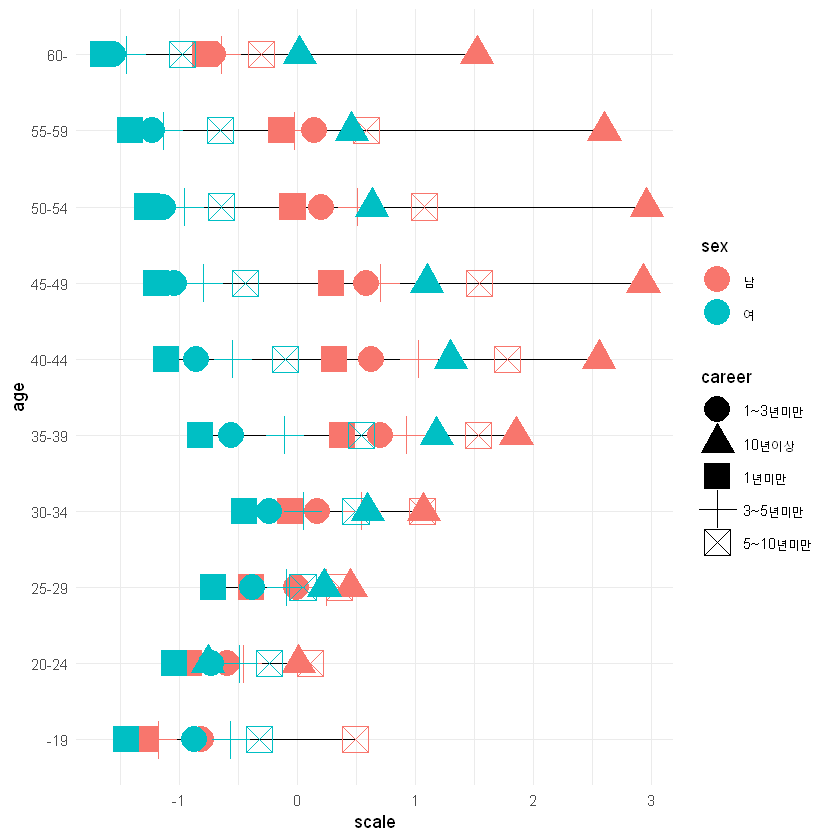

In [74]:
#시각화
g1 <- ggplot(df_scale, aes(x=scale, y=age))
g2 <- geom_segment(aes(yend=age),xend=0)
g3 <- geom_point(size=7,aes(colour=sex, shape=career))
g1 + g2 + g3 + theme_minimal()